In [29]:
import os

cwd = os.getcwd()

In [30]:
import pandas as pd


df = pd.read_csv(cwd + '/data/processed/posts_train_test_clean.csv')

In [31]:
df.head()

,Unnamed: 0,Post Link,Title,Body,Tags,CreationDate,Answer Date,AcceptedAnswerId,id,score,complete_text,normalized_text
0,69943,16835963,Sidekiq not processing queue,"<p>What possible reasons can <a href=""https://...",<ruby-on-rails-3><redis><sidekiq>,2013-05-30 12:19:00,2013-05-30 12:53:32,16836794,16836794,71,sidekiq not processing queue what possible rea...,sidekiq process queue possibl reason sidekiq p...
1,79655,31667160,Running docker container : iptables: No chain/...,<p>I'm trying to run a container but I get the...,<docker><port><iptables>,2015-07-28 04:03:53,2015-07-28 04:14:04,31667244,31667244,65,running docker container iptables no chain tar...,run docker contain iptabl chain target match n...
2,97858,3299648,Python Compilation/Interpretation Process,<p>I'm trying to understand the python compile...,<python><compiler-construction><interpreter><p...,2010-07-21 13:21:47,2010-07-21 13:28:54,3299724,3299724,53,python compilation interpretation process i m ...,python compil interpret process tri understand...
3,14078,3664272,Is std::vector so much slower than plain arrays?,<p>I've always thought it's the general wisdom...,<c++><arrays><performance><stl><vector>,2010-09-08 02:38:41,2010-09-08 02:57:40,3664349,3664349,239,is std vector so much slower than plain arrays...,std vector much slower plain array alway thoug...
4,46299,13342123,How to get relative path of a file in visual s...,<p>I am trying to get the path of an image fil...,<c#><visual-studio>,2012-11-12 10:33:32,2013-10-11 10:57:06,19316470,19316470,100,how to get relative path of a file in visual s...,get rel path file visual studio tri get path i...


### Criando os targets

In [32]:
def split_tags(tags):
    tags = tags[1:-1]
    tags = tags.split("><")
    
    return tags

In [33]:
df['targets'] = df.Tags.apply(lambda x: split_tags(x))

## 100 Tags mais usadas

In [34]:
def calculateTagsEntries(df):
    count = {}
    
    for tags in df['targets']:
        for tag in tags:
            if(tag not in count.keys()):
                dataTag = {
                    'entries': 1,
                }
                count[tag] = dataTag
            else:
                count[tag]['entries'] += 1
    return count

def sortTags(count):
    return dict(sorted(count.items(), key=lambda item: -item[1]['entries']))

In [35]:
classes = []

def createClassesColumn(df):
    for documentTags in df['targets']:
        wasInDocumentTags = False

        for documentTag in documentTags:
            if(documentTag in MostUsedTags):
                wasInDocumentTags = True
                classes.append(documentTag)
                break
        if(not wasInDocumentTags):
            classes.append('unknown-tag')
    df['class'] = classes    

In [36]:
MostUsedTags = list(sortTags(calculateTagsEntries(df)).keys())[:100]
createClassesColumn(df)

In [37]:
y = df['class']

In [38]:
y

0           unknown-tag
1                docker
2                python
3                   c++
4                    c#
              ...      
73917        javascript
73918    android-studio
73919              html
73920        javascript
73921              http
Name: class, Length: 73922, dtype: object

In [39]:
targets_set = set(MostUsedTags + ['unknown-tag'])

In [40]:
len(targets_set)

101

In [41]:
targets_set

{'.net',
 'ajax',
 'algorithm',
 'amazon-web-services',
 'android',
 'android-studio',
 'angular',
 'angularjs',
 'arrays',
 'asp.net',
 'asp.net-mvc',
 'bash',
 'c',
 'c#',
 'c++',
 'c++11',
 'class',
 'cocoa-touch',
 'command-line',
 'css',
 'dart',
 'database',
 'dataframe',
 'date',
 'datetime',
 'debugging',
 'dictionary',
 'django',
 'docker',
 'eclipse',
 'entity-framework',
 'exception',
 'file',
 'flutter',
 'function',
 'git',
 'github',
 'go',
 'google-chrome',
 'gradle',
 'html',
 'http',
 'image',
 'intellij-idea',
 'ios',
 'iphone',
 'java',
 'java-8',
 'javascript',
 'jquery',
 'json',
 'laravel',
 'linq',
 'linux',
 'list',
 'macos',
 'matplotlib',
 'maven',
 'mongodb',
 'multithreading',
 'mysql',
 'node.js',
 'npm',
 'numpy',
 'objective-c',
 'oop',
 'pandas',
 'performance',
 'php',
 'postgresql',
 'python',
 'python-3.x',
 'r',
 'reactjs',
 'regex',
 'rest',
 'ruby',
 'ruby-on-rails',
 'scala',
 'shell',
 'sorting',
 'spring',
 'sql',
 'sql-server',
 'string',
 'swi

In [42]:
words_post = df.complete_text.apply(lambda x: str(x))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=20)
# vectorizer = TfidfVectorizer()
vectorizer.fit(words_post)
X = vectorizer.transform(words_post)

In [43]:
len(vectorizer.vocabulary_)

8714

In [44]:
import gc

gc.collect()

0

In [45]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=44, n_jobs = -1)
lr_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=44)

In [47]:
y_pred = lr_model.predict(X_test)

In [48]:
gc.collect()

45

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[11  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0  5]]


C:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

               .net       0.52      0.09      0.15       127
               ajax       0.00      0.00      0.00         4
          algorithm       0.59      0.25      0.36        51
amazon-web-services       0.67      0.50      0.57        28
            android       0.82      0.84      0.83       801
     android-studio       0.00      0.00      0.00        16
            angular       0.74      0.63      0.68       116
          angularjs       0.73      0.29      0.42        65
             arrays       0.00      0.00      0.00        31
            asp.net       0.42      0.19      0.27        67
        asp.net-mvc       0.27      0.18      0.21        51
               bash       0.67      0.54      0.59       138
                  c       0.66      0.37      0.47       194
                 c#       0.62      0.74      0.67      1141
                c++       0.74      0.71      0.73       645
              c++11    

C:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
cm = confusion_matrix(y_test,y_pred)

In [51]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 
#cm_display.plot()
plt.show() 

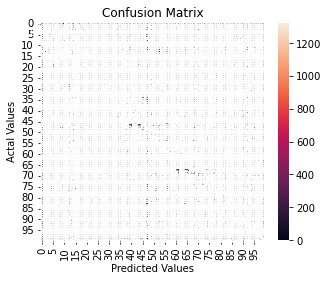

In [52]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [53]:
# import pickle
# s = pickle.dumps(rf_model)
# rf_model_2 = pickle.loads(s)

In [54]:
from joblib import dump, load
dump(lr_model, 'models/lr_model_less_tags.joblib') 

['models/lr_model_less_tags.joblib']

In [55]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# np.mean(cross_val_score(lr_model, X_train, y_train, cv=5))

In [56]:
gc.collect()

607406

#TODO Analisar modelo gerado